In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('titanic.csv')
# df.head(10) shows 10 rows
# df.tail() shows the last rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


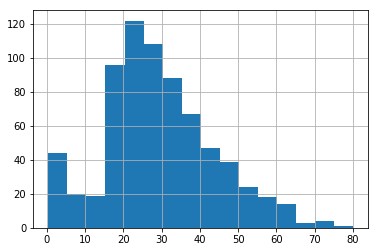

In [8]:
df['Age'].hist(bins=16)
plt.show()

In [9]:
# number of people for which age is NA
df['Age'].isna().sum()

177

In [10]:
df['Gender'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


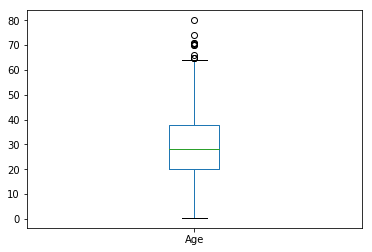

In [13]:
# Green bar is median
df['Age'].plot.box()
plt.show()

In [17]:
age_array= df['Age'].dropna().values

In [23]:
embarked_df = [df['Embarked'] == 'C']
np.sum(embarked_df)

168

In [25]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

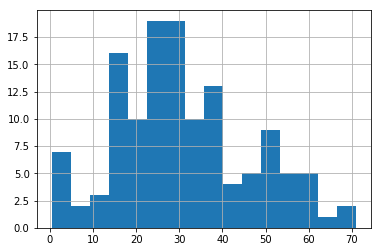

In [27]:
df[df['Embarked'] == 'C']['Age'].hist(bins=16)
plt.show()

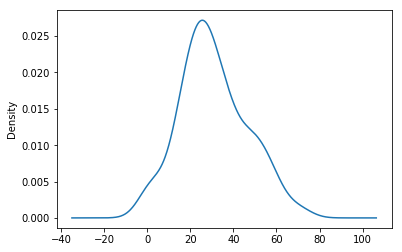

In [28]:
# probability distribution .plot(kind='kde')
df[df['Embarked'] == 'C']['Age'].plot(kind='kde')

In [29]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [31]:
# number of unique values
df['Embarked'].nunique()

3

S    644
C    168
Q     77
Name: Embarked, dtype: int64


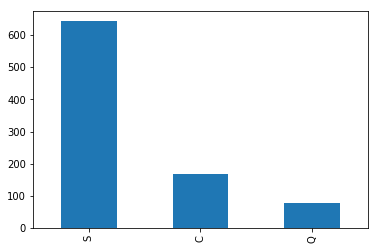

In [34]:
print(df['Embarked'].value_counts())
df['Embarked'].value_counts().plot(kind='bar')
plt.show()

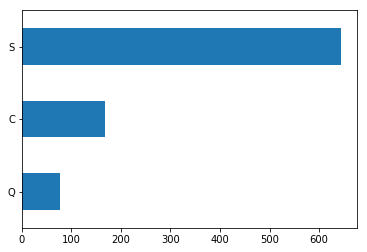

In [38]:
df['Embarked'].value_counts().plot(kind='barh').invert_yaxis()

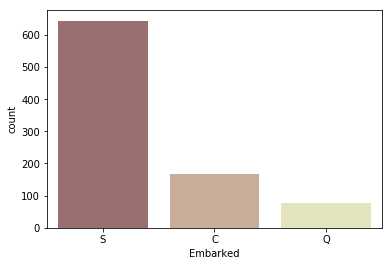

In [47]:
import seaborn as sns

sns.countplot(x='Embarked', palette="pink", data=df)

In [44]:
dict(df['Embarked'].value_counts())

{'C': 168, 'Q': 77, 'S': 644}

In [45]:
df['Sex'].value_counts().to_json()

'{"male":577,"female":314}'

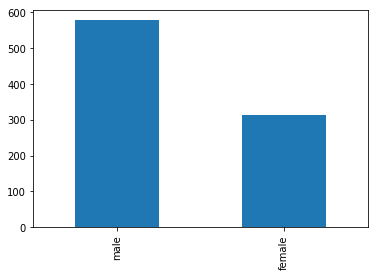

In [48]:
df['Sex'].value_counts().plot(kind='bar')

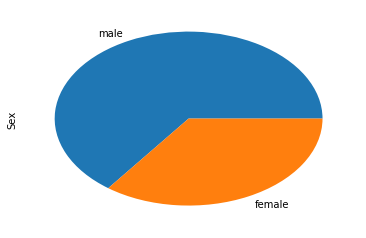

In [51]:
df['Sex'].value_counts().plot(kind='pie')
plt.show()

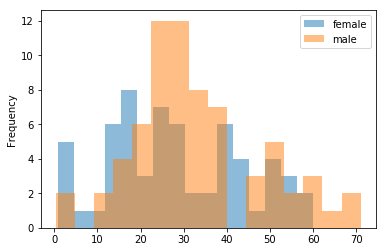

In [60]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].plot(bin=16, kind='hist', legend=True, alpha=0.5)

plt.show()

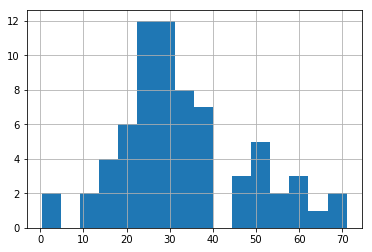

In [56]:
df[(df['Embarked'] == 'C') & (df['Sex'] == 'male')]['Age'].hist(bins=16)

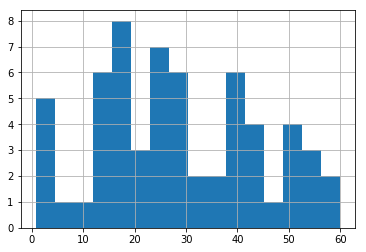

In [57]:
df[(df['Embarked'] == 'C') & (df['Sex'] == 'female')]['Age'].hist(bins=16)

In [61]:
np.mean(df[(df['Embarked'] == 'C') & (df['Sex'] == 'female')]['Age'])

28.34426229508197

In [62]:
np.mean(df[(df['Embarked'] == 'C') & (df['Sex'] == 'male')]['Age'])

32.99884057971015

In [64]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].mean()

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64

In [65]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].agg(np.mean)

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64

In [66]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].apply(lambda x:np.mean(x))

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64

In [67]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].agg(np.max)

Sex
female    60.0
male      71.0
Name: Age, dtype: float64

In [72]:
df['Age'].mean()

29.69911764705882

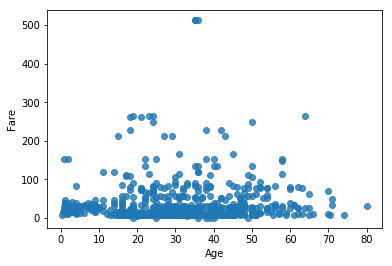

In [73]:
sns.regplot(x='Age', y='Fare', fit_reg=False, data=df)

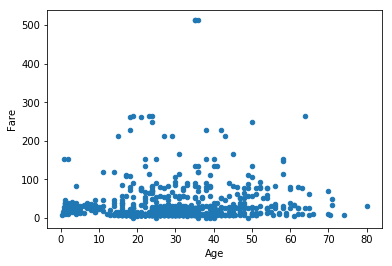

In [75]:
df.plot.scatter(x='Age', y='Fare')

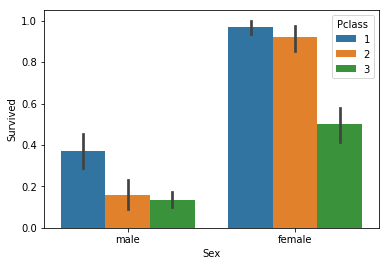

In [76]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)

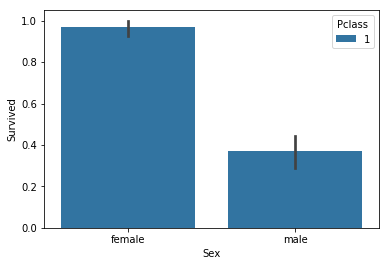

In [81]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df[df['Pclass'] == 1])

In [90]:
df[(df['Pclass'] == 1) & (df['Sex'] == 'female')]['Survived'].value_counts()

1    91
0     3
Name: Survived, dtype: int64

In [96]:
float(dict(df[(df['Pclass'] == 1) & (df['Sex'] == 'female')]['Survived'].value_counts())[1])/sum(dict(df[(df['Pclass'] == 1) & (df['Sex'] == 'female')]['Survived'].value_counts()).values())

0.9680851063829787

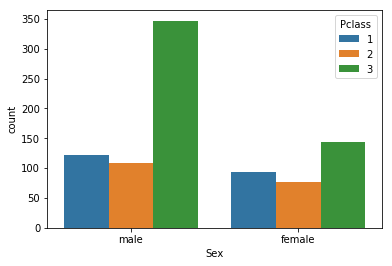

In [97]:
sns.countplot(x='Sex', hue='Pclass',data=df)